# 1. Introduction

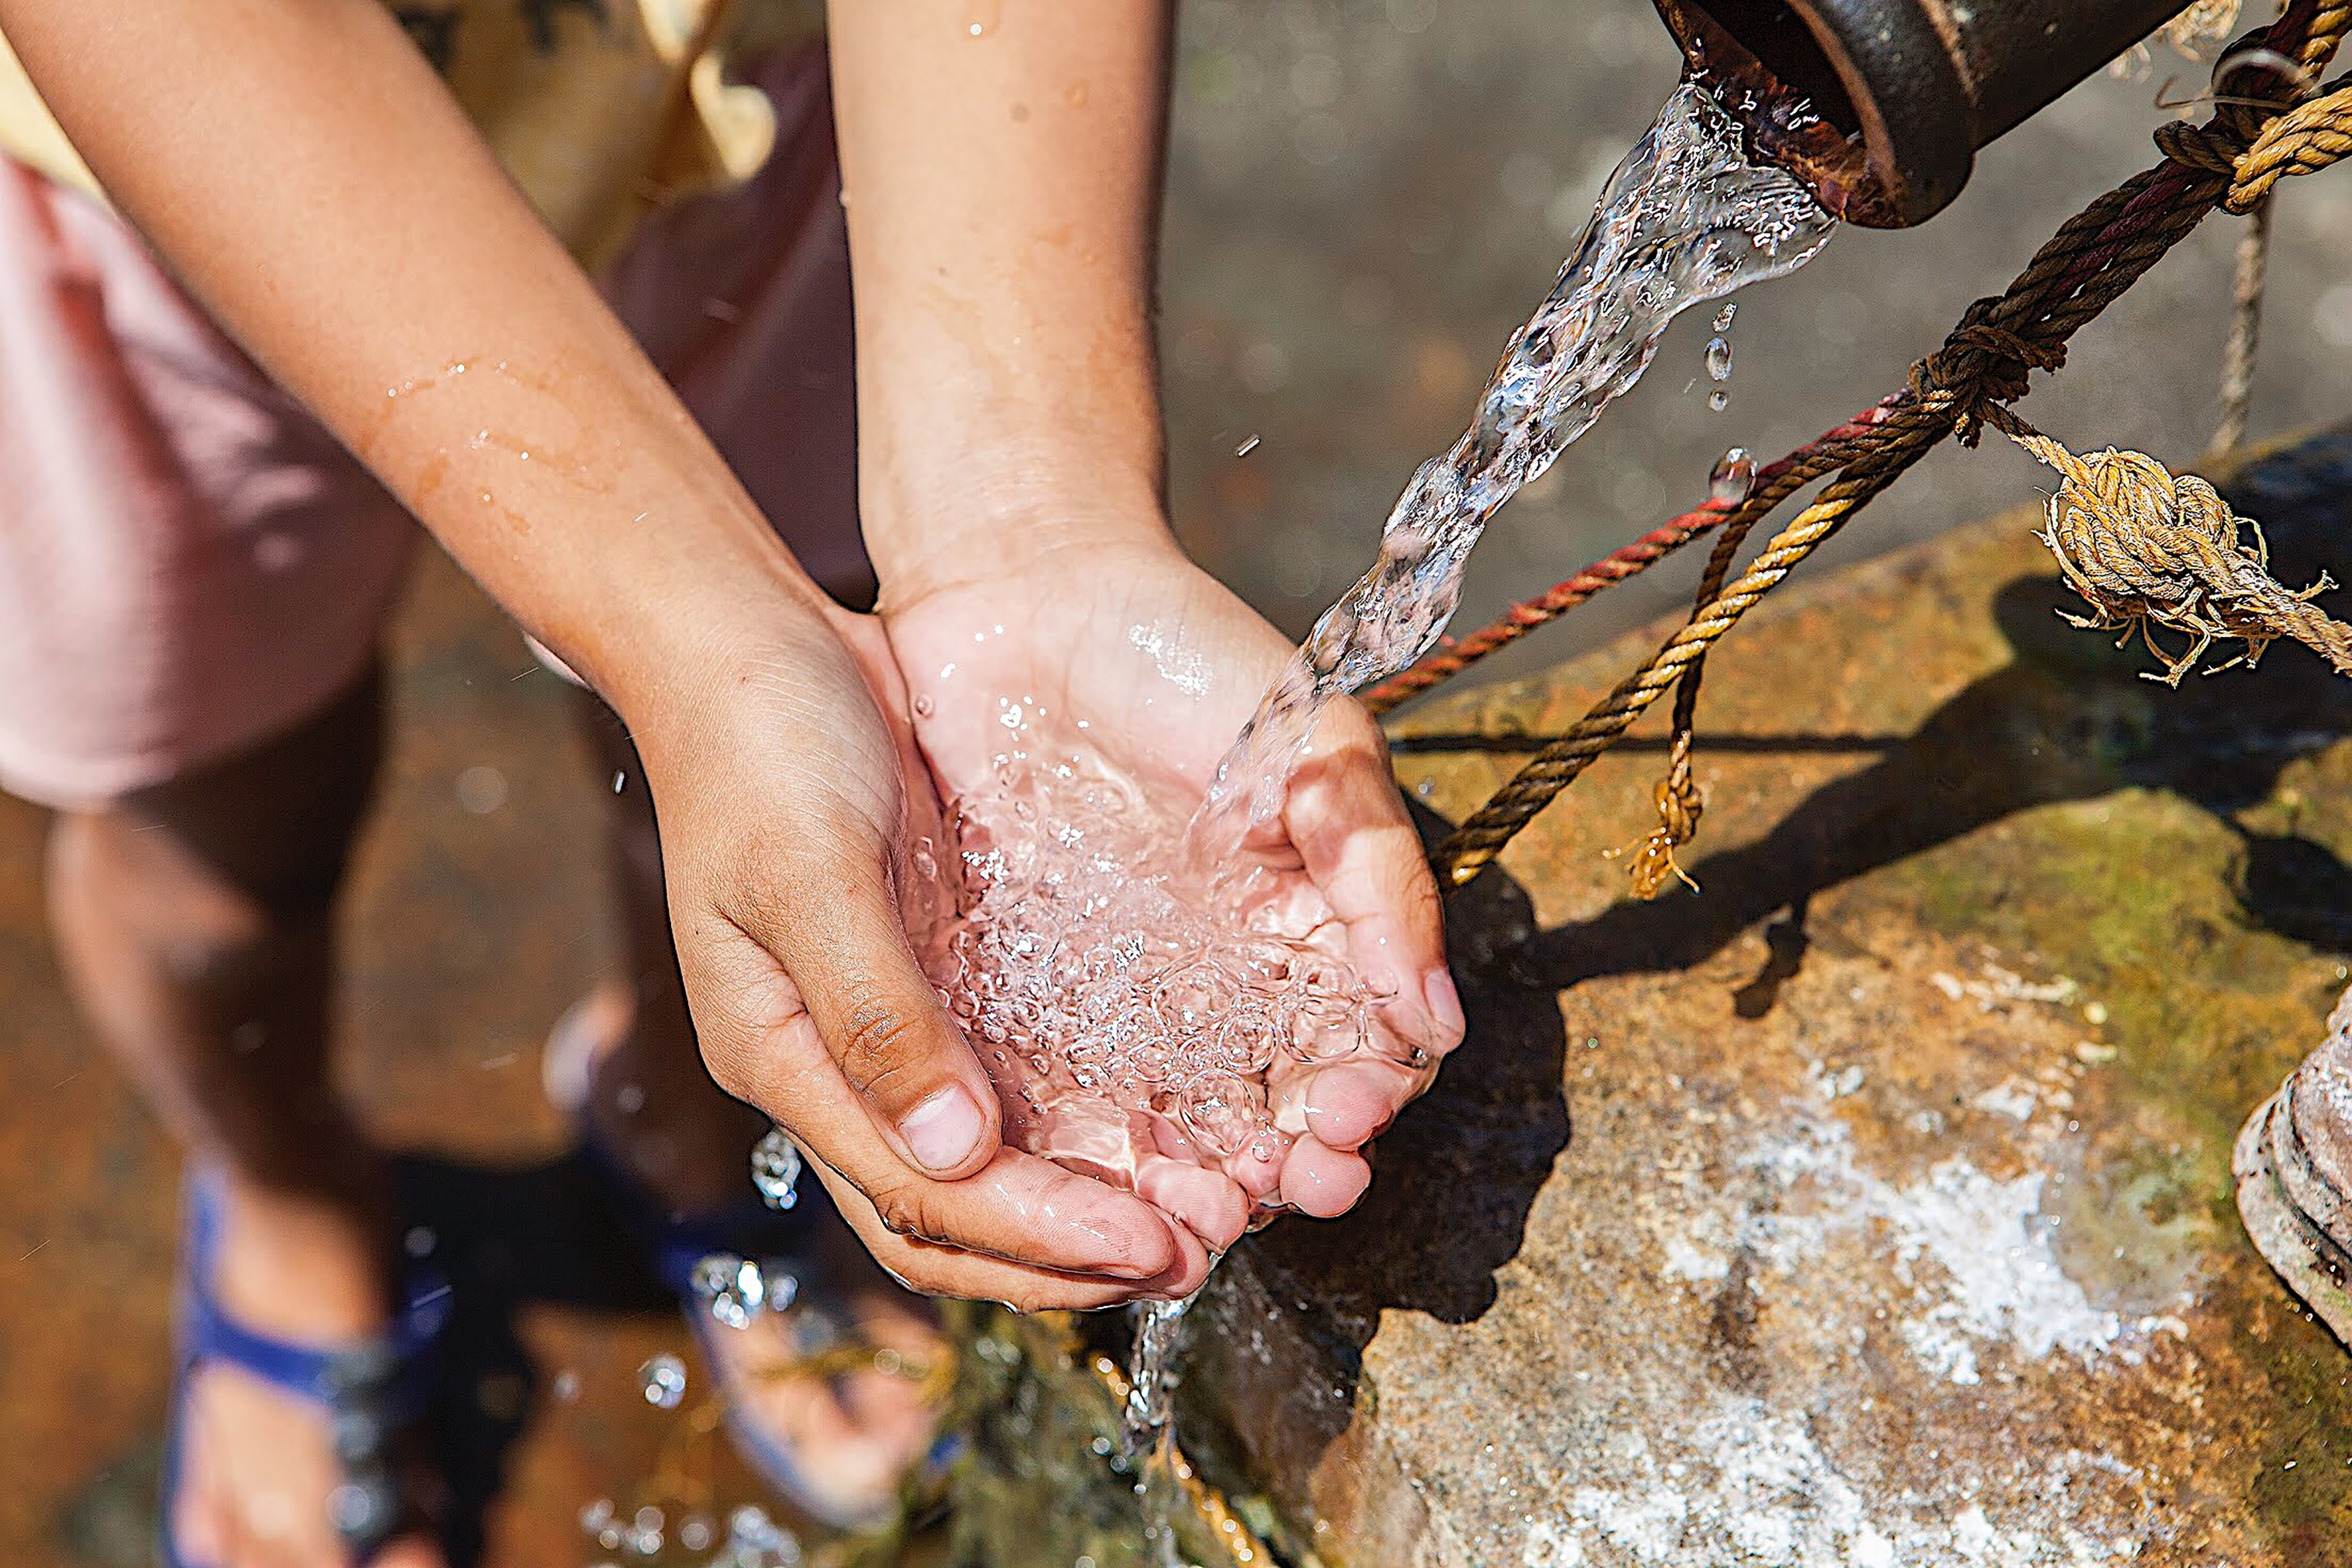

Photo by <a href="https://unsplash.com/@jlanzarini?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Joshua Lanzarini</a> on <a href="https://unsplash.com/s/photos/water-pump?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

## 1.1 Business Understanding

Tanzania has a population of 59 million. According to [water.org](https://water.org/our-impact/where-we-work/tanzania/#:~:text=4%20million%20people%20in%20Tanzania,long%20distances%20to%20collect%20water.) 29 million people in Tanzanialack access to improved sanitazation. 4 million people lack access to safe drinking water. According to [UNICEF](https://www.unicef.org/tanzania/what-we-do/wash) as part of its Vision 2025, the Government of Tanzania has pledged to increase access to improved sanitation to 95 per cent by 2025. The Second Five Year Development Plan (FYDP II) has also set the target for access to improved sanitation facilities at 85 percent in rural areas.

Tanzania is trying to improve their water pump maintenance operations in order to ensure that clean, potable water is available to communities across Tanzania. In order to accomplish this, the Government wants to be able to better predict which pumps will fail, and to better identify pumps that need repair and what factors need to be considered in the future. This will help in improving maintenance efficiency and water access, and they have contracted Roots engineering company to make this happen.

## 1.2 Data understanding

The dataset used for this anaysis was downloaded from [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/). The data was was acquired from [Taarifa](https://taarifa.org/) and [Tanzanian Ministry of Water](https://www.maji.go.tz/). The data contains information about wells in Tanzania. The data has three files: training set values, training set labels and test set values.ha The data has the following set of information about the water pumps:
- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private - Private use or not
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint


# 2. Data wrangling

## 2.1 Loading libraries and datasets

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
# expanding the number of visible columns

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',100)

In [3]:
# loading the data

data = pd.read_csv('Data/Raw/Training set values.csv')
data_labels = pd.read_csv('Data/Raw/Training set labels.csv')

In [4]:
# merging the dataframes 

df = pd.merge(left = data, right = data_labels, on = 'id')

In [5]:
# previewing the complete dataframe

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## 2.2 Descriptive statistics

In [6]:
# previewing the shape of the data

print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 59400 rows and 41 columns


In [7]:
# getting the statistics of the numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


## 2.3 Data cleaning

### 2.3.1 Completeness

Before any analysis and preprocessing is done on the data, the data needs to be cleaned in case of any inconsistencies. The first aspect that needs to be checked is whether the data has any missing values.

In [8]:
# checking for null values in the dataset

df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [9]:
# calculating the percentage of missing values

null_values = pd.DataFrame(df.isna().sum()/len(df)*100).rename(columns = {0:'Null Percentage'})
null_values = null_values[(null_values['Null Percentage'] > 0)]
null_values.sort_values(by = 'Null Percentage', ascending = False)

,Null Percentage
scheme_name,47.417508
scheme_management,6.526936
installer,6.153199
funder,6.119529
public_meeting,5.612795
permit,5.144781
subvillage,0.624579


`scheme_name` column has 47% of it's data missing. This means that almost half the rows in this column have no values. This percentage is too high, hence the column needs to be dropped.

In [10]:
# dropping the column 'scheme_name'

df.drop(columns = 'scheme_name', inplace = True)

In [11]:
# previewing the missing columns

df[['scheme_management', 'installer', 'funder', 'public_meeting','permit','subvillage']].head()

,scheme_management,installer,funder,public_meeting,permit,subvillage
0,VWC,Roman,Roman,True,False,Mnyusi B
1,Other,GRUMETI,Grumeti,NaN,True,Nyamara
2,VWC,World vision,Lottery Club,True,True,Majengo
3,VWC,UNICEF,Unicef,True,True,Mahakamani
4,NaN,Artisan,Action In A,True,True,Kyanyamisa


No clear pattern could be found for why the data was missing. So the missing values will be imputed in such a way that the missing values will still be missing

In [12]:
# imputing the missing values

df.fillna(value = 'MISSING', inplace = True)

All the  missing values have been handled, and the data is now complete

### 2.3.2 Uniformity

The next aspect to look into is the uniformity of the data. This check will include looking at the data types of the different columns and ensuring they are are correct.

In [13]:
# checking the column datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The columns `date_recorded` has the data types object. This needs to be converted to a date-type data type.

In [14]:
# converting the column's data type

df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [15]:
# extracting the year from the `date_recorded` column

df['year_recorded'] = df['date_recorded'].dt.year

### 2.3.3 Consistency

The next aspect to look into in whether the data has any duplicates.

In [16]:
# checking for duplicates

print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


Another aspect to look into is if there are columns that are similar. These need to be looked into. it can be noted that some columns have almost the same information, with small disparities.

### `waterpoint_type` vs `waterpoint_type_group`

In [17]:
# checking unique values

df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [18]:
# checking unique values

df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

It can be noted that these columns are similar, except from the fact that `waterpoint_type` has an extra feature called 'Communal Standpipe Multiple' which is a version of the 'Communal Standpipe'. `waterpoint_type_group` can be dropped.

### `source` vs `source_type`

In [19]:
# checking unique values

df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [20]:
# checking unique values

df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

These 2 categories also have similar entries, `source_type` can be retained.

In [21]:
# checking unique values

df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

### `quantity` vs `quantity_group`

In [22]:
# checking unique values

df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [23]:
# checking unique values

df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These columns have the same records, so one can be dropped. `quantity_group` can be dropped.

### `water_quality` vs `quality_group`

In [24]:
# checking unique values

df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [25]:
# checking unique values

df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

The two columns have similar entries. `water_quality` has 2 extra columns, with salty divided into salty and salty abandoned, and fluoride divided into fluoride and fluoride abandoned. Also, soft water is classified as good in `quality_group`. One column can be dropped. `quality_group` can be dropped.

### `payment` vs `payment_type`

In [26]:
# checking unique values

df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [27]:
# checking unique values

df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Both have the same entries, hence one can be dropped. `payment_type` can be dropped.

### `management` vs `scheme_management`

In [28]:
# change entries to lower case for comparison

df['management'] = df['management'].str.lower()
df['scheme_management'] = df['scheme_management'].str.lower()

In [29]:
print('The management and scheme management columns have {} entries that are the same'.format(df.loc[(df['management'] == df['scheme_management'])].shape[0]))
print('The management and scheme management columns have {} entries that are not the same'.format(df.loc[(df['management'] != df['scheme_management'])].shape[0]))

The management and scheme management columns have 49336 entries that are the same
The management and scheme management columns have 10064 entries that are not the same


In [30]:
# checking unique values

df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [31]:
# checking unique values

df['scheme_management'].value_counts()

vwc                 36793
wug                  5206
missing              3877
water authority      3153
wua                  2883
water board          2748
parastatal           1680
private operator     1063
company              1061
other                 766
swc                    97
trust                  72
none                    1
Name: scheme_management, dtype: int64

The two columns have alot of entries that are similar. `scheme_management` had 3,877 entries that were missing. Taking that these columns are similar, `scheme_management` can be dropped, and `management` can be used to represent the management.

### `extraction_type` vs `extraction_type_group` vs `extraction_type_class`

In [32]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [33]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [34]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

The three columns have similar entries for the most part, hence two can be dropped. `extraction_type_class` has generalized the different types better among the 3 columns, hence, will be retained.

### 2.3.4 Validity

Some columns are not important, hence can be dropped, so as to remain with only the necessary columns. column `id` can be dropped since it shows that the water pumps are unique. `num_private`indicates whether a water pump is private or not, but the data is not clear, so it can also be dropped.

In [41]:
df.drop(columns = ['waterpoint_type_group', 'source', 'quantity_group', 'quality_group', 'payment_type', 'scheme_management', 'extraction_type', 'id', 'num_private','extraction_type_group'], inplace=True)

Exploring other columns. From the describe table, it can be noted that `longitude` had zero values, which is incorrect for Tanzania. This column needs to be investigated further.

In [43]:
# creating a dataframe of the longitudes with zero values

long_0 = df[df['longitude'] == 0.0]

# ckecking the location of these values 

long_0['region'].value_counts()

Shinyanga    1005
Mwanza        807
Name: region, dtype: int64

In [44]:
long_0

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded
21,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,MISSING,GeoData Consultants Ltd,False,0,handpump,wug,user-group,unknown,unknown,unknown,shallow well,groundwater,hand pump,functional,2013
53,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,True,0,submersible,vwc,user-group,unknown,unknown,dry,borehole,groundwater,communal standpipe multiple,non functional,2011
168,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,False,0,gravity,parastatal,parastatal,other,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,2013
177,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,MISSING,GeoData Consultants Ltd,False,0,other,wug,user-group,unknown,soft,enough,shallow well,groundwater,other,non functional,2013
253,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,True,0,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional needs repair,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,GeoData Consultants Ltd,False,0,handpump,wug,user-group,other,soft,enough,shallow well,groundwater,hand pump,functional needs repair,2011
59208,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,MISSING,GeoData Consultants Ltd,False,0,handpump,wug,user-group,unknown,soft,enough,shallow well,groundwater,hand pump,functional,2013
59295,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,GeoData Consultants Ltd,False,0,handpump,wug,user-group,never pay,soft,enough,shallow well,groundwater,hand pump,functional needs repair,2011
59324,0.0,2013-01-22,World Vision,0,World Vision,0.0,-2.000000e-08,Mwazwilo,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,MISSING,GeoData Consultants Ltd,False,0,handpump,wug,user-group,unknown,soft,enough,shallow well,groundwater,hand pump,functional,2013


The entries will zeros under `longitude` are from 2 regions: Shinyanga and Mwanza. One way of imputing these values is the mean `longitude` of these regions, of the entries with proper coordinates. 

In [45]:
# creating a dataframe of the rows with correct coordinates

df2 = df.loc[(df['longitude'] != 0.0)]

# creating a dataframe of the regions and their mean longitude

region_longitudes = df2.groupby(['region'])['longitude'].mean().reset_index()

# subsetting the df to the regions with entries with null longitudes

region_longitudes.loc[(region_longitudes['region'] == 'Shinyanga') | (region_longitudes['region'] == 'Mwanza')]

,region,longitude
13,Mwanza,33.091564
17,Shinyanga,33.240121


It can be noted that both regions have a mean `longitude` of 33. The entries that have a longitude of zero can be imputed with this value of 33

In [46]:
df['longitude'].replace(to_replace= 0, value = 33, inplace = True)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_tsh,59400.0,317.650385,2997.574558,0.000000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.000000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,35.084093,2.593829,29.607122,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.649440,-8.540621,-5.021597,-3.326156,-2.000000e-08
region_code,59400.0,15.297003,17.587406,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.000000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.000000,0.000000,1986.000000,2004.000000,2.013000e+03
year_recorded,59400.0,2011.921667,0.958758,2002.000000,2011.000000,2012.000000,2013.000000,2.013000e+03


In [48]:
df['latitude'].sort_values()

43832   -1.164944e+01
57743   -1.164838e+01
7328    -1.158630e+01
51116   -1.156858e+01
27708   -1.156680e+01
             ...     
2958    -2.000000e-08
32423   -2.000000e-08
2953    -2.000000e-08
32382   -2.000000e-08
22559   -2.000000e-08
Name: latitude, Length: 59400, dtype: float64

## 2.4 Feature Engineering

From the columns `construction_year` and `date_recorded`, a new column can be created to record the age of the well at the time of audit. This may be a crucial column.

In [49]:
df['well_age'] = df['year_recorded'] - df['construction_year']

In [50]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded,well_age
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,False,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional,2011,12
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,MISSING,GeoData Consultants Ltd,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013,3
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,True,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,2013,4
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,True,1986,submersible,vwc,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional,2013,27
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,True,0,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011,2011


In [51]:
df[(df['construction_year'] == 0)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded,well_age
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,True,0,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011,2011
6,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,True,0,handpump,vwc,user-group,never pay,soft,enough,borehole,groundwater,hand pump,non functional,2012,2012
7,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,True,0,handpump,wug,user-group,unknown,milky,enough,shallow well,groundwater,hand pump,non functional,2012,2012
8,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,True,0,handpump,vwc,user-group,never pay,salty,seasonal,borehole,groundwater,hand pump,non functional,2012,2012
9,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,True,0,handpump,vwc,user-group,never pay,soft,enough,shallow well,groundwater,hand pump,functional,2011,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,Lake Victoria,Songambele,Kagera,18,30,Ngara,Nyamiyaga,0,True,GeoData Consultants Ltd,False,0,gravity,vwc,user-group,never pay,soft,insufficient,spring,groundwater,communal standpipe,non functional,2011,2011
59392,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,Lake Rukwa,Mbuyuni A,Mbeya,12,1,Chunya,Mbuyuni,0,True,GeoData Consultants Ltd,True,0,gravity,vwc,user-group,never pay,soft,enough,spring,groundwater,communal standpipe,non functional,2011,2011
59393,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,Internal,Masanga,Tabora,14,2,Igunga,Igunga,0,False,GeoData Consultants Ltd,False,0,gravity,private operator,commercial,pay per bucket,soft,insufficient,dam,surface,other,functional,2012,2012
59397,0.0,2011-04-11,MISSING,0,MISSING,34.017087,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,False,0,handpump,vwc,user-group,pay monthly,fluoride,enough,borehole,groundwater,hand pump,functional,2011,2011


In [82]:
df['year_recorded'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year_recorded, dtype: int64

(array([20709.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 38691.]),
 array([   0. ,  201.3,  402.6,  603.9,  805.2, 1006.5, 1207.8, 1409.1,
        1610.4, 1811.7, 2013. ]),
 <BarContainer object of 10 artists>)

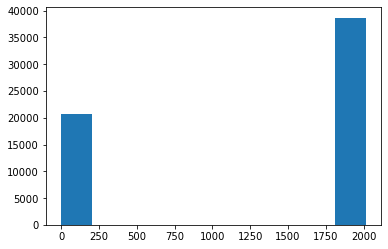

In [84]:
plt.hist(x = df['construction_year'])

In [90]:
df['construction_year'].median()

1986.0

<AxesSubplot:xlabel='construction_year'>

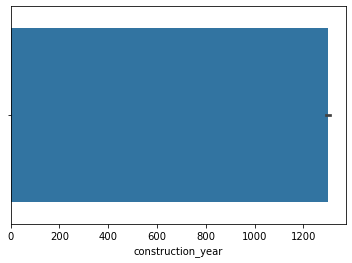

In [88]:
fig, ax = plt.subplots()

sns.barplot(data = df, x = 'construction_year')

In [53]:
df.to_csv('Data/Processed/Cleaned Tanzania Water Pump Data.csv')

# 3. Exploratory Data Analysis(EDA)

In [54]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'permit', 'construction_year',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'water_quality', 'quantity', 'source_type', 'source_class',
       'waterpoint_type', 'status_group', 'year_recorded', 'well_age'],
      dtype='object')

## 3.1 Does location have an impact on well functionality?

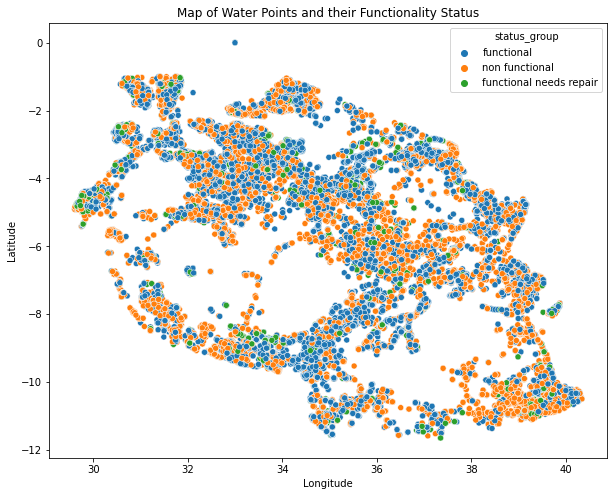

In [55]:
fig, ax = plt.subplots(figsize = (10,8))

sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'status_group')

ax.set_title('Map of Water Points and their Functionality Status')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude');

It can be noted that there is a cluster of non-functional water points in the south-east area, middle and south-west region. It can also be noted that there are huge open spaces with no water points.

In [56]:
#df.loc[(df['latitude'] == -2e-08)]

In [57]:
#df.loc[22559]

In [58]:
#df['latitude'].sort_values(ascending=False).head(100)

In [59]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'permit', 'construction_year',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'water_quality', 'quantity', 'source_type', 'source_class',
       'waterpoint_type', 'status_group', 'year_recorded', 'well_age'],
      dtype='object')

## 3.2 Does water quality affect well functionality?

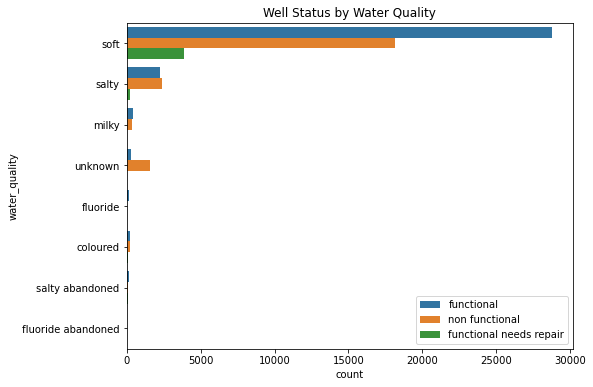

In [60]:
# plotting water quality

fig, ax = plt.subplots(figsize = (8,6))

sns.countplot(data = df, y = 'water_quality', hue = 'status_group', orient = 'h')

ax.set_title('Well Status by Water Quality')
ax.legend(loc = 'lower right')

plt.savefig('Images/Well status by Water Quality');

It can be noted that most wells have soft water, and most are functional, but also has the highest number of non-functional wells, and also those that need repair.Wells with salty and unknown water quality have higher numbers of non-functional wells as compared to the functional ones.

## 3.3 Does the extraction type affect well functionality?

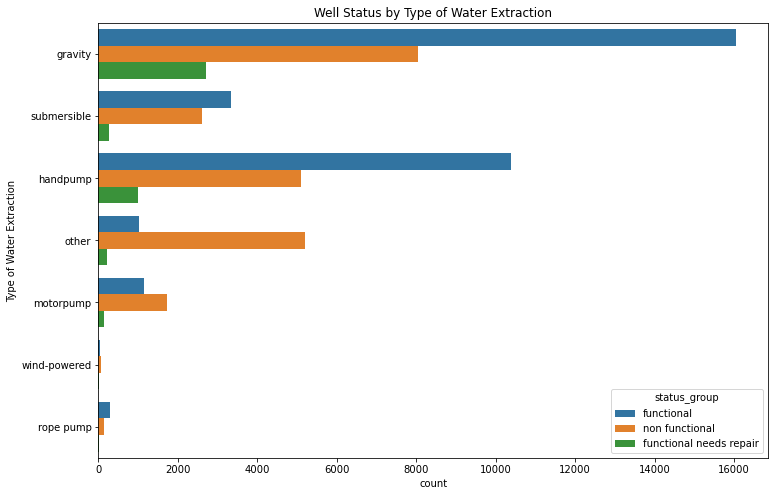

In [61]:
# plotting extraction type vs well functionality

fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(data = df, y= 'extraction_type_class', hue = 'status_group')

ax.set_title('Well Status by Type of Water Extraction')
ax.set_ylabel('Type of Water Extraction')

plt.savefig('Images/Well Status by Extraction Type');

It can be noted that most wells use `gravity` to extract the water, then followed by a `hand pump`.These 2 methods also have a lot of functional wells, as well as non-functional ones. It can be noted with concern, that `other` means of water extraction has more non-functional than functional ones. The number of non-functional wells in this case is almost tripple that of the functional ones. It can also be noted that under `motor pump`, non-functional wells also lead.

## 3.4 Do different water sources affect well functionality?

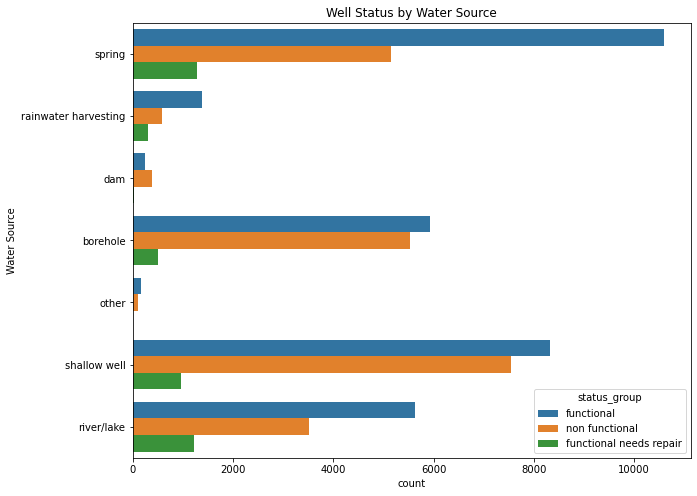

In [62]:
# plotting water sources vs well functionality

fig, ax = plt.subplots(figsize = (10,8))

sns.countplot(data = df, y = 'source_type', hue = 'status_group')

ax.set_title('Well Status by Water Source')
ax.set_ylabel('Water Source')

plt.savefig('Images/Well Status by Water Source');

It can be noted that `shallow wells` and `borehole` have a very high number of non-functional wells, which are just slightly lower than the number of functional wells.

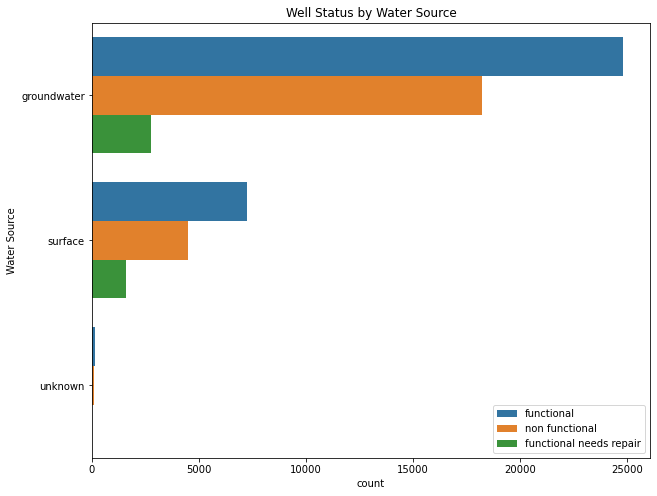

In [63]:
# plotting water sources vs well functionality

fig, ax = plt.subplots(figsize = (10,8))

sns.countplot(data = df, y = 'source_class', hue = 'status_group')

ax.set_title('Well Status by Water Source')
ax.set_ylabel('Water Source')
ax.legend(loc = 'lower right')

plt.savefig('Images/Well Status by Water Source');

In [64]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'permit', 'construction_year',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'water_quality', 'quantity', 'source_type', 'source_class',
       'waterpoint_type', 'status_group', 'year_recorded', 'well_age'],
      dtype='object')

In [65]:
df['source'].value_counts()

KeyError: 'source'

In [ ]:
df['source_class'].value_counts()

In [ ]:
df.columns

An area of interest would be the distribution of the well status

In [ ]:
# creating a dataframe of the distribution of the status of the wells

status = pd.DataFrame(df['status_group'].value_counts(normalize = True)*100)
status

In [ ]:
# plotting the distribution of the status of the wells

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x = status.index, height = status['status_group'])
#dict = {'fontsize':14}

ax.set_title('Distribution of well status')
ax.set_xlabel('Well Status')
ax.set_ylabel('Distribution in Percentage')

plt.savefig('Images/Distribution of well status');

# 4. Modelling

Before any modelling is done, some pre-processing needs to be done.

# 5. Evaluation